4.对增强的图像利用阈值方法进行分割；

(-0.5, 255.5, 255.5, -0.5)

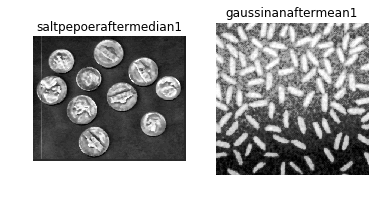

In [2]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import disk
import skimage.filters.rank as sfr
gaussinan = io.imread(r'.\pic\gaussiannoiseimage.bmp',0)
saltpepoer = io.imread(r'.\pic\saltpepoernoiseimage.bmp')
def mean_img(img,n):
    imgt = sfr.mean(img, disk(n))
    return imgt
def median_img(img,n):
    imgt = sfr.median(img, disk(n))
    return imgt
saltpepoeraftermedian = median_img(saltpepoer,2)
gaussinanaftermean = mean_img(gaussinan,2)
from skimage import exposure
gaussinanaftermean1=exposure.equalize_hist(gaussinanaftermean)
saltpepoeraftermedian1 = exposure.equalize_adapthist(saltpepoeraftermedian, clip_limit=0.03)
plt.subplot(121);plt.title('saltpepoeraftermedian1');plt.imshow(saltpepoeraftermedian1, cmap ='gray')
plt.axis("off")
plt.subplot(122);plt.title('gaussinanaftermean1');plt.imshow(gaussinanaftermean1, cmap ='gray')
plt.axis("off")

定义切割函数

In [5]:
from skimage import filters
def cutoff(image):
    thresh = filters.threshold_otsu(image)  
    cutted =(image <= thresh)*1.0 
    return cutted

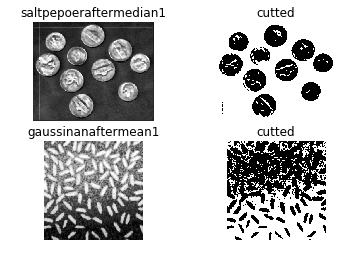

In [6]:
plt.subplot(221);plt.title('saltpepoeraftermedian1');plt.imshow(saltpepoeraftermedian1, cmap ='gray')
plt.axis("off")
plt.subplot(222);plt.title('cutted');plt.imshow(cutoff(saltpepoeraftermedian1), cmap ='gray')
plt.axis("off")
plt.subplot(223);plt.title('gaussinanaftermean1');plt.imshow(gaussinanaftermean1, cmap ='gray')
plt.axis("off")
plt.subplot(224);plt.title('cutted');plt.imshow(cutoff(gaussinanaftermean1), cmap ='gray')
plt.axis("off")
plt.show()